# Data exploration script

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore_functions import *
from scipy import stats
from proj1_helpers import *
from os import path

In [27]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.figsize"] =(24,18)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# Import raw training data
basepath = path.dirname(path.realpath("Project1_Data_exploration.ipynb"))
data_path = path.abspath(path.join(basepath, "../all/",  "train.csv"))
yb, input_data, ids = load_csv_data(data_path, sub_sample=False)

In [29]:
# Create data frames to used with pandas library
x = input_data
y = yb
y[y == -1.] = 0

In [30]:
# Replace -999 by NaN
x_nan = x
x_nan[x == -999] = np.nan

x_o = x_nan[y == 1.,:]
x_z = x_nan[y == 0,:]

print(x_o)
print(x_z)

# Calculate fraction of NaNs
num_nas_o = []
nas_frac_o = []
num_nas_z = []
nas_frac_z = []

for c in range(0, 30):
    num_nas_o.append(np.count_nonzero(np.isnan(x_o[:, c])))
    nas_frac_o.append(np.divide((num_nas_o[c]), x_o.shape[0]))
    num_nas_z.append(np.count_nonzero(np.isnan(x_z[:, c])))
    nas_frac_z.append(np.divide((num_nas_z[c]), x_z.shape[0]))
    
print(nas_frac_o)
print(nas_frac_z)

[[ 1.38470e+02  5.16550e+01  9.78270e+01 ...  1.24000e+00 -2.47500e+00
   1.13497e+02]
 [ 1.48754e+02  2.88620e+01  1.07782e+02 ...  1.31000e-01 -2.76700e+00
   1.79877e+02]
 [ 1.54916e+02  1.04180e+01  9.47140e+01 ...          nan          nan
   3.06380e+01]
 ...
 [ 1.33457e+02  7.75400e+01  8.89890e+01 ...          nan          nan
   7.09690e+01]
 [ 1.30075e+02  3.91800e+00  6.67810e+01 ...  5.78000e-01 -2.21500e+00
   5.46066e+02]
 [ 1.05457e+02  6.05260e+01  7.58390e+01 ...          nan          nan
   4.19920e+01]]
[[160.937  68.768 103.235 ...     nan     nan  46.226]
 [    nan 162.172 125.953 ...     nan     nan  44.251]
 [143.905  81.417  80.943 ...     nan     nan   0.   ]
 ...
 [    nan  58.179  68.083 ...     nan     nan   0.   ]
 [ 94.951  19.362  68.812 ...     nan     nan   0.   ]
 [    nan  72.756  70.831 ...     nan     nan   0.   ]]
[0.03309325644647297, 0.0, 0.0, 0.0, 0.6210326029859806, 0.6210326029859806, 0.6210326029859806, 0.0, 0.0, 0.0, 0.0, 0.0, 0.621032602985

Text(0,0.5,'Fraction of invalid data')

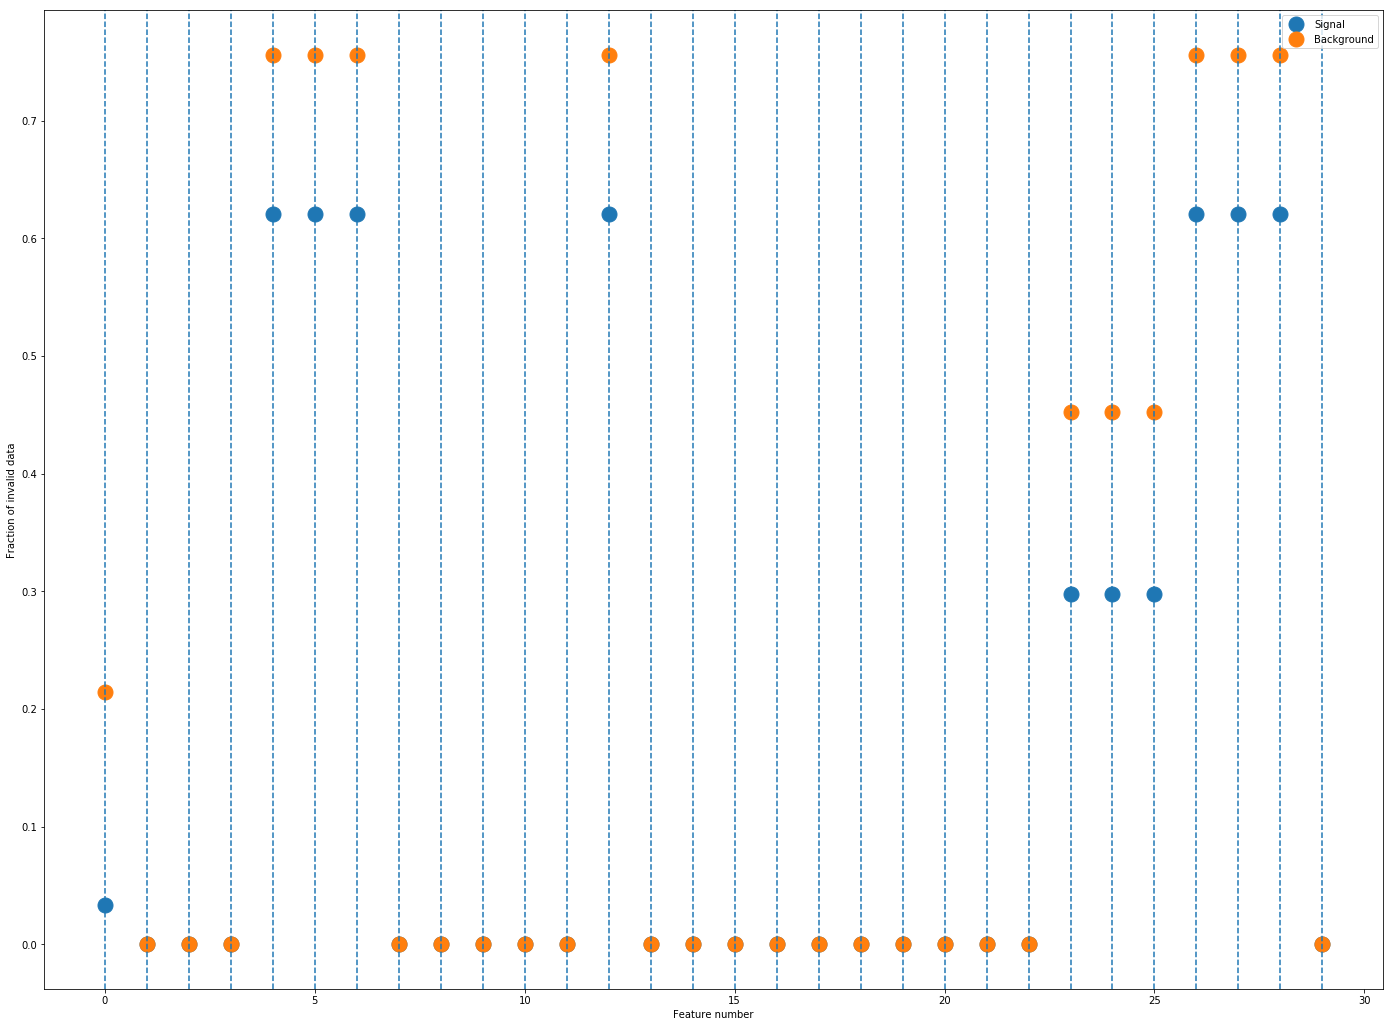

In [37]:
# Visualize proportion of missing data
fig=plt.figure()
plt.plot(np.arange(30), nas_frac_o, '.', markersize=30)
plt.plot(np.arange(30), nas_frac_z, '.', markersize=30)
plt.legend(['Signal','Background'])
for i in range(30):
    plt.axvline(i, linestyle='--')
plt.xlabel('Feature number')
plt.ylabel('Fraction of invalid data')
# plt.savefig('Missing_data_frac.png')

In [7]:
# We looked at different ways of dealing with this missing data. We looked at whether it made any difference to replace 
# missing values with the mean specific to each class or the mean of all feature values, irrespective of the class. We 
# first plotted the distributions of the data
# We first separated the data into classes, calculated the mean for each class, and plotted the distributions for each class:
# Replace missing data with the mean from each class
x_clean, x_ones, x_zeros = replace_nans(x_nan, y)

In [8]:
# Normalize data
x_ones = norm_x(x_clean[y == 1.])
x_zeros = norm_x(x_clean[y == 0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5523400888967497, 0.02333782621752064, 5.943865843111403e-228, 0.3692907906363707, 0.03896203808699638, 0.0, 0.00014242824685300378, 0.0, 0.0, 0.0, 0.8914600159871032, 0.8945815174941751, 0.0, 0.3506373460235441, 3.4638405387439655e-07, 0.0]


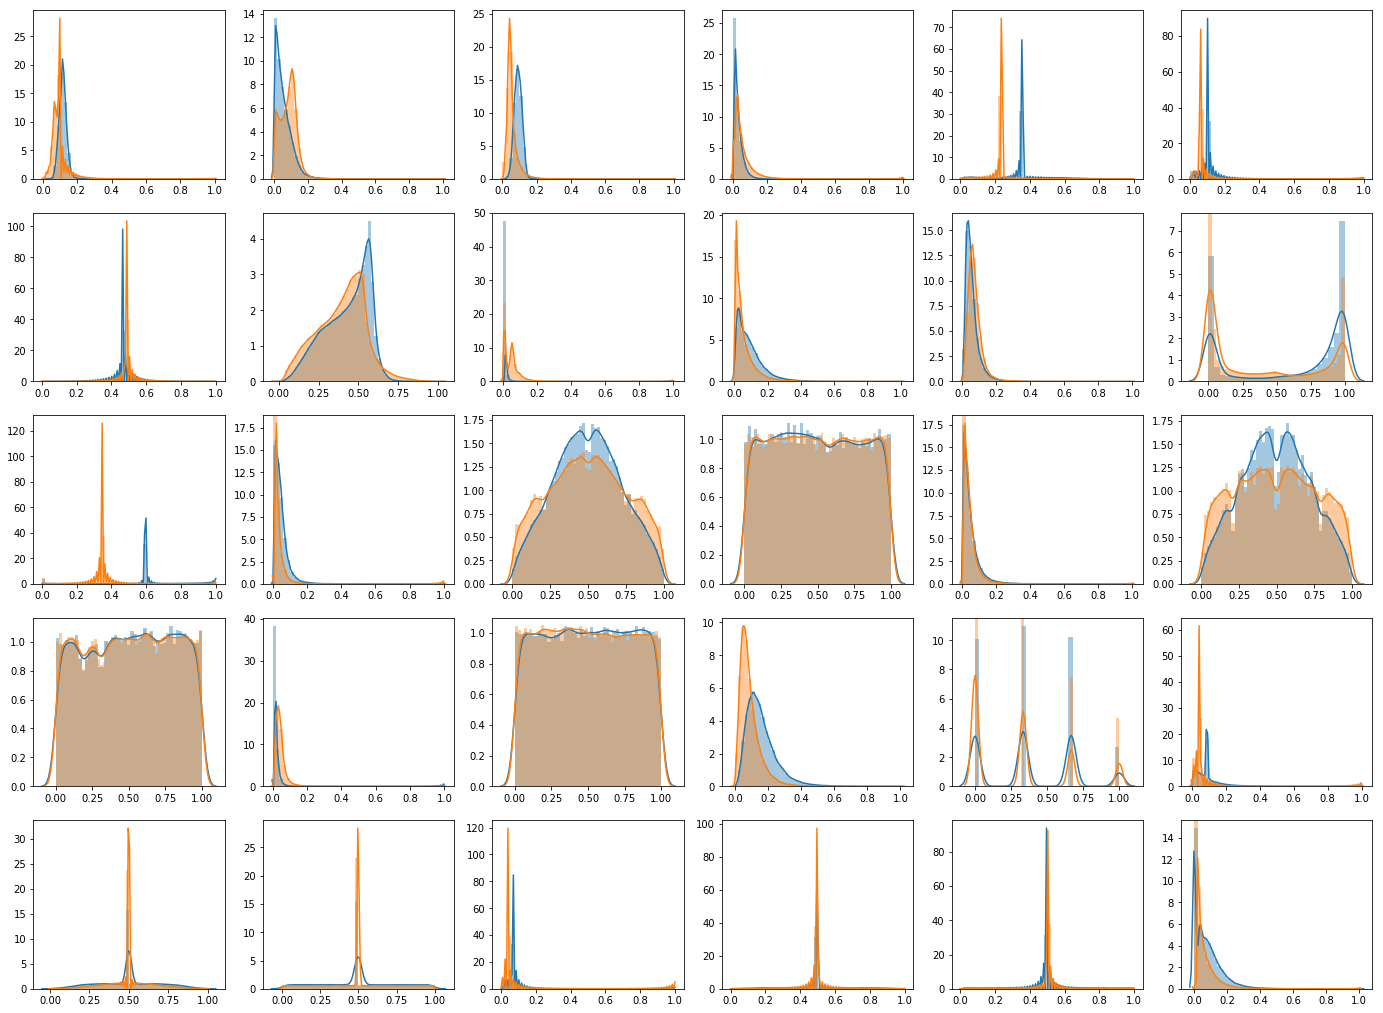

In [9]:
# Compare data distributions between classes, when replacing missing data
# with mean of each class

fig=plt.figure()
p_values = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones[:, i-1], x_zeros[:, i-1], equal_var=False)
    p_values.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones[:,i-1], norm_hist=True)
    sns.distplot(x_zeros[:,i-1], norm_hist=True)

print(p_values)
plt.savefig('Compare distributions raw data (class mean).png')

In [10]:
# Then we looked at the distributions when replacing missing values with the means of all values
x_clean_means, x_means = replace_nans_gen_mean(x_nan)

In [11]:
# Normalize data
x_ones_means = norm_x(x_clean_means[y == 1.])
x_zeros_means = norm_x(x_clean_means[y == 0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5523400888967497, 0.02333782621752064, 5.943865843111403e-228, 0.3692907906363707, 0.03896203808699638, 0.0, 0.00014242824685300378, 0.0, 0.0, 0.0, 0.8914600159871032, 0.8945815174941751, 0.0, 0.3506373460235441, 3.4638405387439655e-07, 0.0]


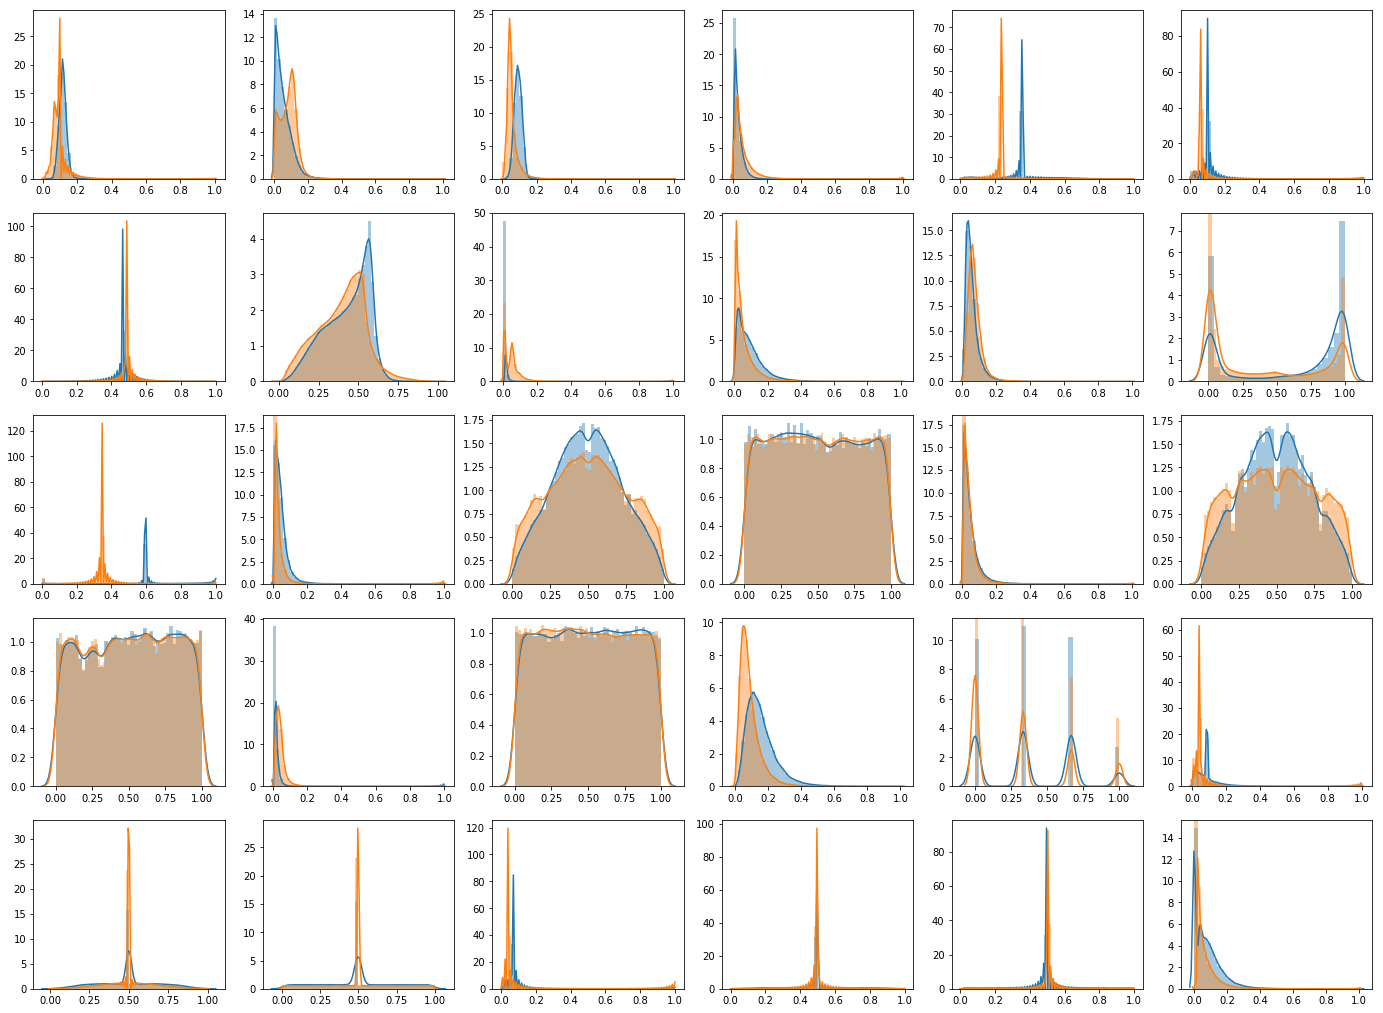

In [12]:
# Compare data distributions between classes, when replacing missing data
# with mean of all samples

fig=plt.figure()
p_values = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones_means[:, i-1], x_zeros_means[:, i-1], equal_var=False)
    p_values.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones_means[:,i-1], norm_hist=True)
    sns.distplot(x_zeros_means[:,i-1], norm_hist=True)

print(p_values)
plt.savefig('Compare distributions raw data (general mean).png')

In [13]:
# As distributions did not look different, and as we would not know the classes for the testing set to calculate separate
# means, we used the mean of all samples to fill in missing values
x_gen_mean, _ = replace_nans_gen_mean(x_nan)

In [14]:
# Transform data whenever skewed. Apply cubed transformation when moderately skewed to the left (< -0.5), 
# and log transformation when moderately skewed to the right (> 0.5)
# https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
x_transformed = transform_to_gauss(x_gen_mean)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.010874329312873e-11, 6.331073652621995e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6227867087586955, 0.027640941277211298, 2.9339524061949593e-100, 0.42433045408706427, 0.03896203808699076, 2.628849983747935e-156, 0.00018533065662558617, 0.0, 0.0, 0.0, 0.8617407679624872, 0.894581517494081, 2.689467683899313e-248, 0.3506373460235481, 1.891963860610803e-07, 0.0]


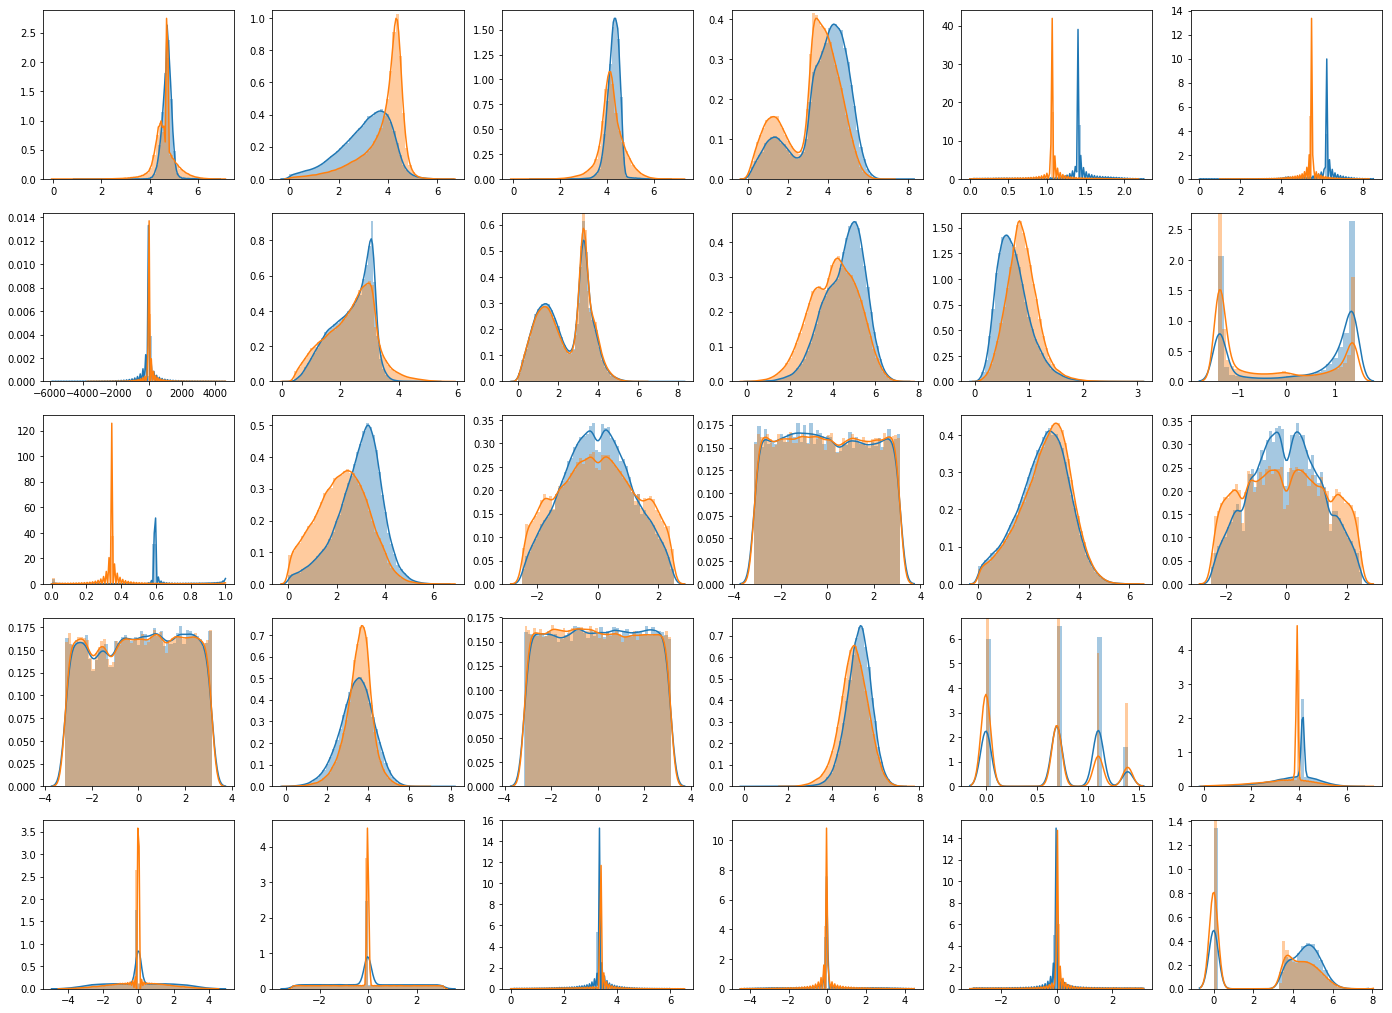

In [15]:
# Compare data distributions between classes after transformation

fig=plt.figure()
p_values = []

x_tr_ones = x_transformed[y == 1.]
x_tr_zeros = x_transformed[y == 0]

for i in range(1,31):
    t_test = stats.ttest_ind(x_tr_ones[:, i-1], x_tr_zeros[:, i-1], equal_var=False)
    p_values.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_tr_ones[:,i-1], norm_hist=True)
    sns.distplot(x_tr_zeros[:,i-1], norm_hist=True)

print(p_values)
plt.savefig('Compare distributions transformed data.png')

In [16]:
# Standardize data
x_preprocessed = zscore_std(x_transformed)

In [17]:
# Create dataframe to visualize with pandas
df_x = pd.DataFrame(x_preprocessed)
df_y = pd.DataFrame({'outcome':y})
data = [df_y, df_x]
df = pd.concat(data, axis=1)
# Take a sample of the data to reduce plotting times
df_sample = df.sample(1000) 

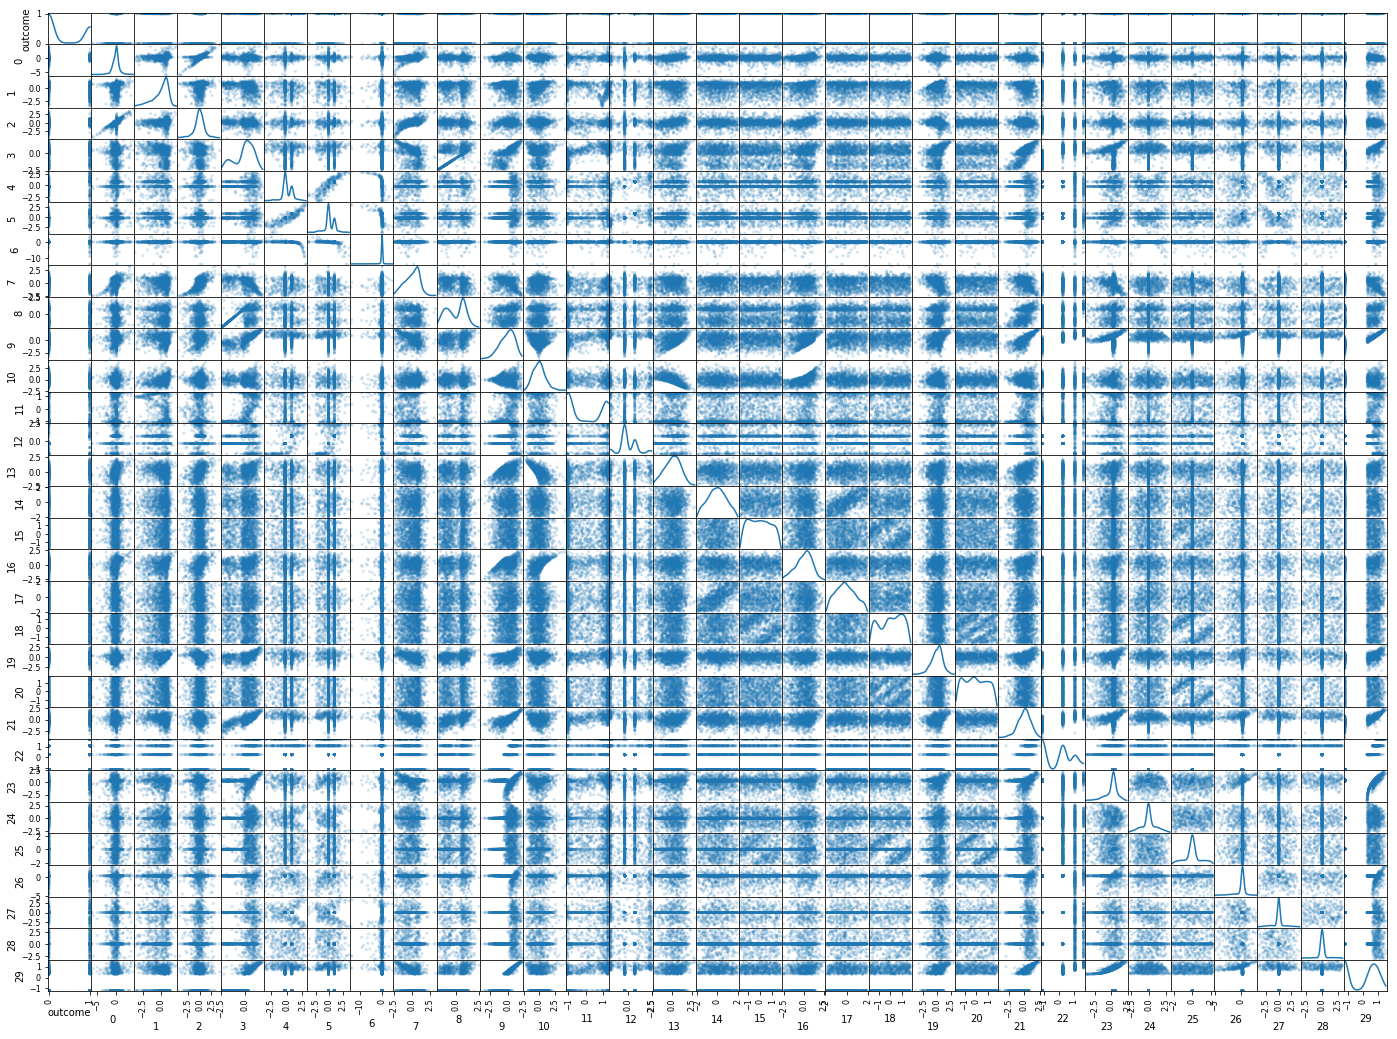

In [18]:
# We used a scatter matrix to look at the distribution of the features and their interactions
#Scatter matrix
fig=plt.figure()
pd.plotting.scatter_matrix(df_sample, alpha=0.2, diagonal='kde') # kde stands for kernel density estimation 
plt.savefig('matrixplot_cleaned.png')

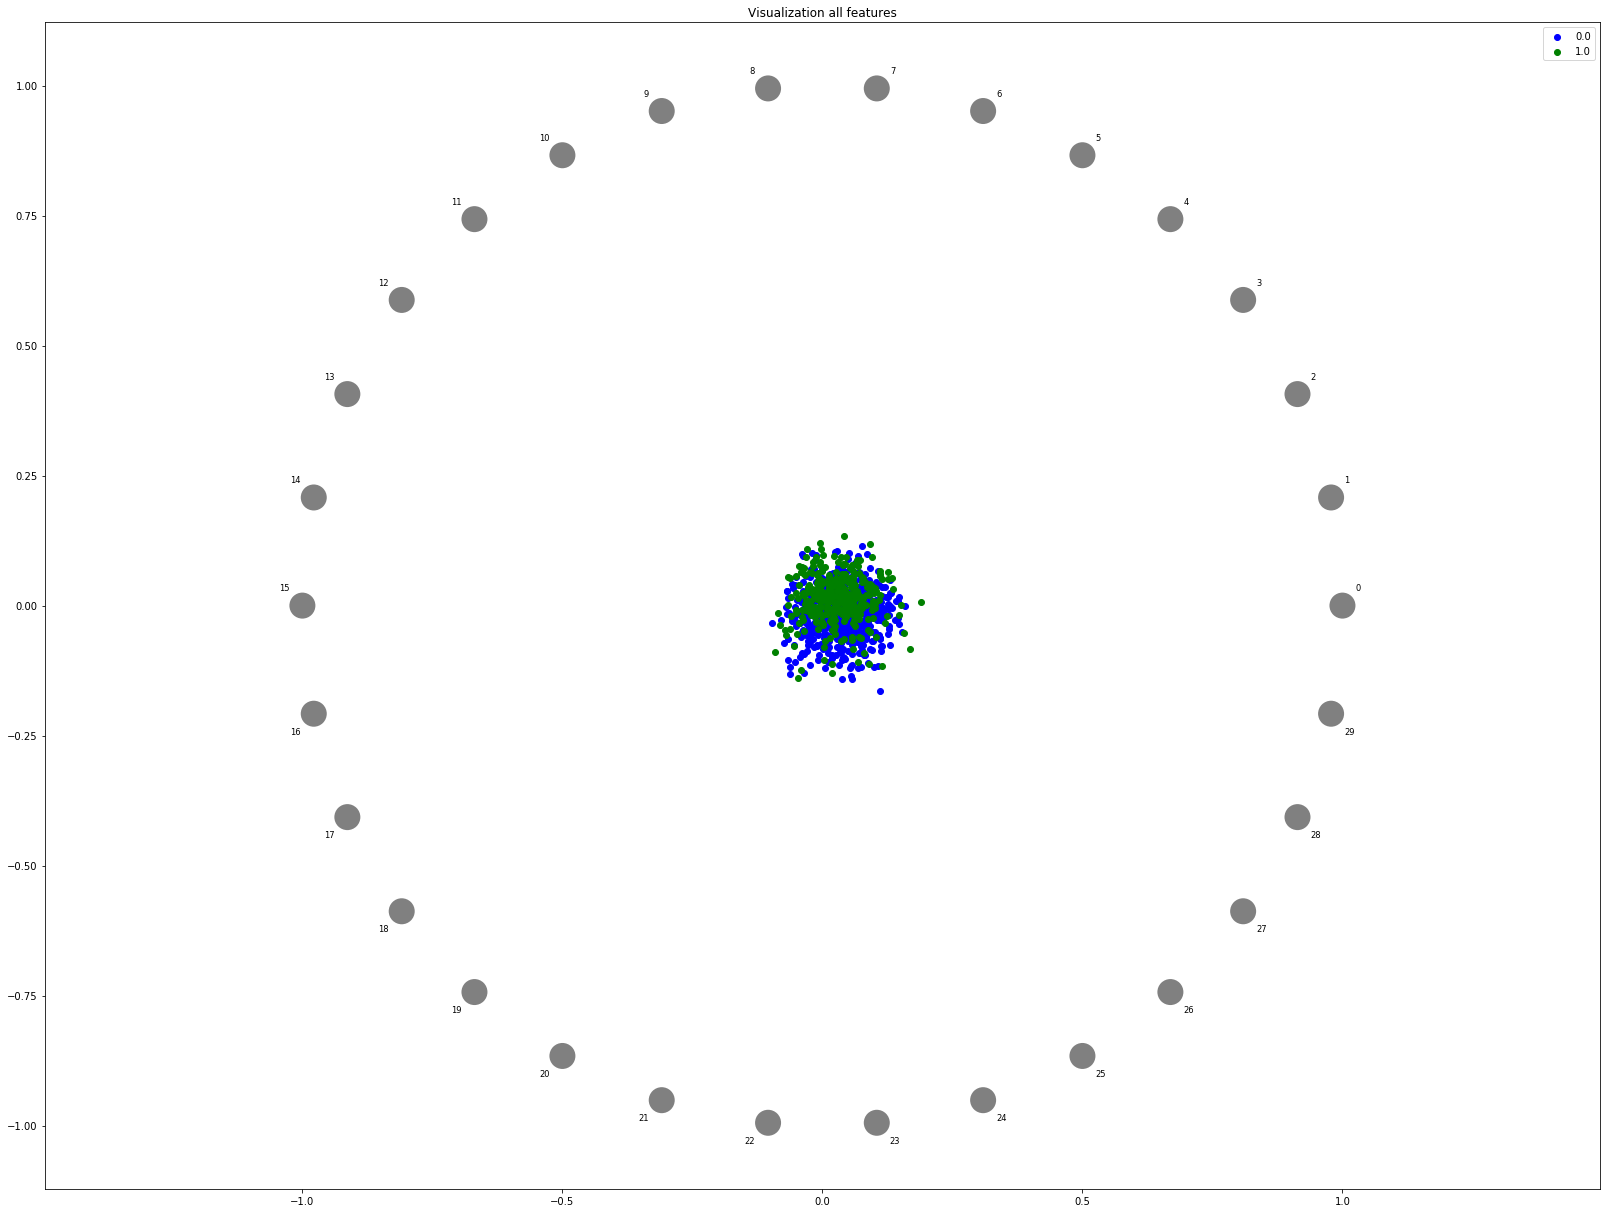

In [19]:
# Then, we tried to look whether there was any easily discernible separation between classes using radial visualization
#RadViz (cleaned data)
fig=plt.figure()
ax = fig.add_axes( [.05, .05, .9, .9], title='Visualization all features')
pd.plotting.radviz(df_sample, 'outcome', ax=ax, color=['blue', 'green'])
plt.savefig('radviz_cleaned.png')